In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import shap

sns.set_style("whitegrid")



In [2]:
df = pd.read_csv("/Users/jaiveersinghkhanuja/Desktop/credit_card_detection_project/creditcard.csv")

X = df.drop("Class", axis=1)
y = df["Class"]

# Train-test split (if needed)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:333: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:333: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/miniconda3/lib/python3.13/site-packag

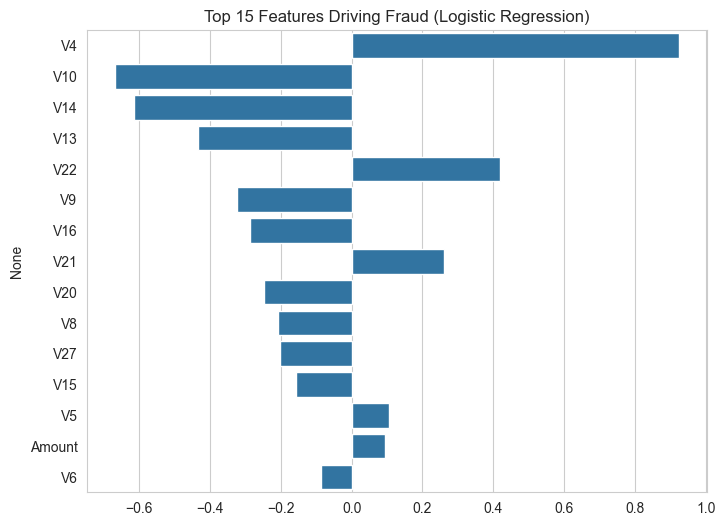

In [3]:
# Fit logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

coef = pd.Series(lr.coef_[0], index=X.columns)
coef = coef.sort_values(key=abs, ascending=False)[:15]

plt.figure(figsize=(8,6))
sns.barplot(x=coef.values, y=coef.index)
plt.title("Top 15 Features Driving Fraud (Logistic Regression)")
plt.show()


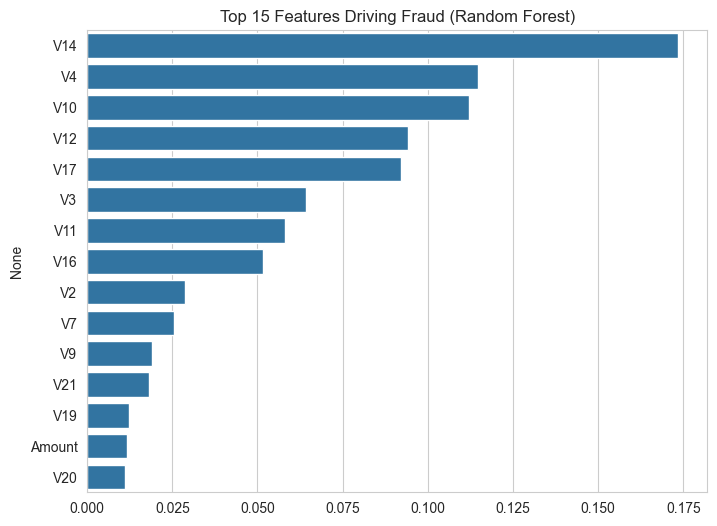

In [4]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Top 15 Features Driving Fraud (Random Forest)")
plt.show()


In [ ]:
explainer = shap.Explainer(rf, X_train_scaled)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test, plot_type="bar")


  9%|==                  | 9741/113924 [01:35<16:56]       